In [1]:
#bring in all the libraries we wish to use.
import cv2 as cv #openCV library
import numpy as np #numeric python library for arrays and matrices
import matplotlib.pyplot as plt #plotting library

#Create Training

In [2]:
# Feature set containing 25 * 2 for 25 (x,y) values of known/training data that are random integers 0-99
trainData = np.random.randint(0,100,(25,2)).astype(np.float32) #25 of (x,y) float values, each random int 0..99. Matrix 25x2
# Label each one either Red or Blue with numbers 0 and 1. Response is a random integers 0-1 of 25 * 1 values
responses = np.random.randint(0,2,(25,1)).astype(np.float32) #25 values of (x) each random 0..1.  Matrix 25x1.  0 - Red, 1 - Blue.


In [3]:
print(responses.shape)
print(responses.dtype)

(25, 1)
float32


In [4]:
array_1d = np.array([1, 2, 3]) #this is treated as a vector, not a matrix with 1 column.
print(array_1d.shape)

(3,)


In [5]:
print ("Training Data:\n", trainData)
print("\n Responses:\n", responses) #In Matrix form.
print("Responses Ravel or flattened as 1-D:\n", responses.ravel()) #Method .ravel flattens the np array to 1-D.
print("Red Responses: \n ", responses.ravel()== 0) #color 0 is "Red", color 1 is blue
responses_flat = responses.ravel() #this is a vector
print(responses_flat.shape)

Training Data:
 [[66. 36.]
 [61. 68.]
 [71. 21.]
 [87. 98.]
 [21. 72.]
 [93. 16.]
 [12. 65.]
 [93. 20.]
 [ 4.  8.]
 [83. 53.]
 [36. 61.]
 [ 7. 45.]
 [98. 35.]
 [59. 23.]
 [57. 82.]
 [67. 20.]
 [81. 53.]
 [83. 50.]
 [72. 59.]
 [60. 62.]
 [98. 54.]
 [12. 44.]
 [78. 57.]
 [93. 71.]
 [41. 63.]]

 Responses:
 [[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]]
Responses Ravel or flattened as 1-D:
 [1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 1.]
Red Responses: 
  [False  True  True  True False False False False False False False  True
  True False False  True False  True  True  True False False False  True
 False]
(25,)


In [6]:
# Make red and blue
red = trainData[responses.ravel()==0] #red is now trained data with responses of 0
print(red)

[[61. 68.]
 [71. 21.]
 [87. 98.]
 [ 7. 45.]
 [98. 35.]
 [67. 20.]
 [83. 50.]
 [72. 59.]
 [60. 62.]
 [93. 71.]]


In [7]:
blue = trainData[responses.ravel()==1] #blue is now the trained data with responses of 1
print(blue)

[[66. 36.]
 [21. 72.]
 [93. 16.]
 [12. 65.]
 [93. 20.]
 [ 4.  8.]
 [83. 53.]
 [36. 61.]
 [59. 23.]
 [57. 82.]
 [81. 53.]
 [98. 54.]
 [12. 44.]
 [78. 57.]
 [41. 63.]]


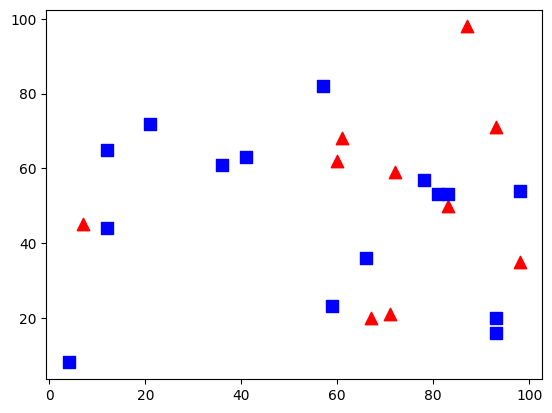

In [8]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, ...)
plt.scatter(red[:,0],red[:,1],80,'r','^') #size 80, red, triangle
plt.scatter(blue[:,0],blue[:,1],80,'b','s') #size 80, blue, square
plt.show()

#Test Unknown Data

In [14]:
#create 1 * 2 or 1 (x,y) value with random integer 0-99
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
l1 = [0.,5., 10., 15., 7.,3.]
newcomers = np.reshape(l1, (3, 2))
print(newcomer)
print(newcomers)

[[68. 50.]]
[[ 0.  5.]
 [10. 15.]
 [ 7.  3.]]


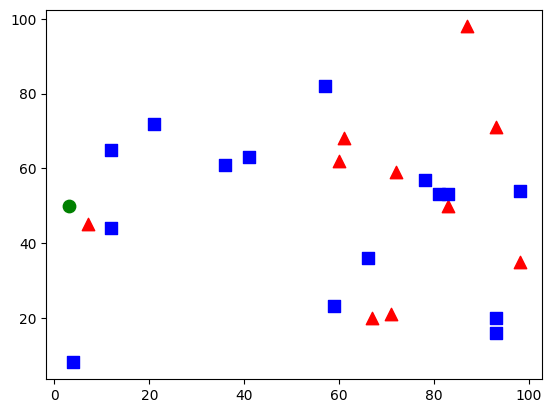

In [10]:
plt.scatter(red[:,0],red[:,1],80,'r','^') #red, triangle
plt.scatter(blue[:,0],blue[:,1],80,'b','s') #blue, square
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o') #green, circle
plt.show()

In [ ]:
colorName = np.array(['Red', 'Blue'])

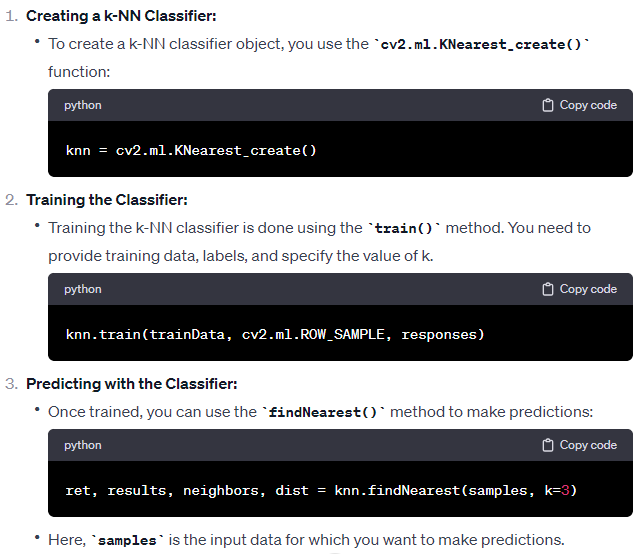

In [11]:
knn = cv.ml.KNearest_create() #object knn from class.
knn.train(trainData, cv.ml.ROW_SAMPLE, responses) #training data and the response label is fed into model.
k = 3 #set the no. of nearest neighbors to use
ret, results, neighbors, dist = knn.findNearest(newcomer, k) #KNN is called to classify newcomer.

In [15]:
knn = cv.ml.KNearest_create() #object knn from class.
knn.train(trainData, cv.ml.ROW_SAMPLE, responses) #training data and the response label is fed into model.
k = 3 #set the no. of nearest neighbors to use
#ret, results, neighbors, dist = knn.findNearest(newcomers, k) #in case of multiple newcomers

error: OpenCV(4.8.0) /io/opencv/modules/ml/src/knearest.cpp:313: error: (-215:Assertion failed) test_samples.type() == CV_32F && test_samples.cols == samples.cols in function 'findNearest'


In [ ]:
resultColor = colorName[results[0].astype(int)]
neighborColors = colorName[neighbors[0].astype(int)]

In [ ]:
print( "result color:  {}\n".format(resultColor) )
print( "neighbors:  {}\n".format(neighbors) )
print( "neighbor colors:  {}\n".format(neighborColors) )
print( "neighbor distances:  {}\n".format(dist[0]) )

result color:  ['Red']

neighbors:  [[0. 0. 0.]]

neighbor colors:  ['Red' 'Red' 'Red']

neighbor distances:  [221. 260. 298.]

